# Life Expectancy and GDP Analysis

This project aims to analyze and understand the relationship between Life Expectancy and Gross Domestic Product (GDP) across various countries. Through this analysis, we seek insights into how economic factors may influence health and longevity at a global scale.

The data used in this project comes from two reliable sources: the World Health Organization (WHO) and the World Bank, providing comprehensive indicators on life expectancy and economic performance.

Let's dive into the data to explore patterns, trends, and correlations that might highlight the impact of GDP on life expectancy.

Has life expectancy increased over time in the six nations?

Has GDP increased over time in the six nations?

Is there a correlation between GDP and life expectancy of a country?

What is the average life expectancy in these nations?

What is the distribution of that life expectancy?

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from pandas.plotting import autocorrelation_plot
from scipy.stats import pearsonr

In [41]:
## Read in Data
data = pd.read_csv("all_data.csv")
print(data.head())
print(data.info())
data.rename(columns={"Country":"country","Year":"year","Life expectancy at birth (years)": "life_expectancy","GDP":"gdp"}, inplace=True)
print(data.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95

In [42]:
print('The Life Expactancy Mean is ' + str(np.mean(data.life_expectancy)))

countries = data["country"].unique()
c_list = ', '.join(countries)
print(f"The countries contained in the dataset are: {c_list}.")


The Life Expactancy Mean is 72.78958333333334
The countries contained in the dataset are: Chile, China, Germany, Mexico, United States of America, Zimbabwe.


## GDP and Life Expectancy Comparisson

The plots below compares the GDP and the Life Expactancy of each country.

In [43]:
# Calculate total GDP Mean per country
gdp_by_country = data.groupby('country')['gdp'].mean().sort_values(ascending=False)
# Calculate total Life Expectancy Mean per country
le_by_country = data.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)
# Loop through life expectancy means and print each one
for country, le_mean in le_by_country.items():
    print(f"The life expectancy mean for {country} is {le_mean}.")


The life expectancy mean for Germany is 79.65625.
The life expectancy mean for Chile is 78.94375.
The life expectancy mean for United States of America is 78.0625.
The life expectancy mean for Mexico is 75.71875.
The life expectancy mean for China is 74.2625.
The life expectancy mean for Zimbabwe is 50.09375.


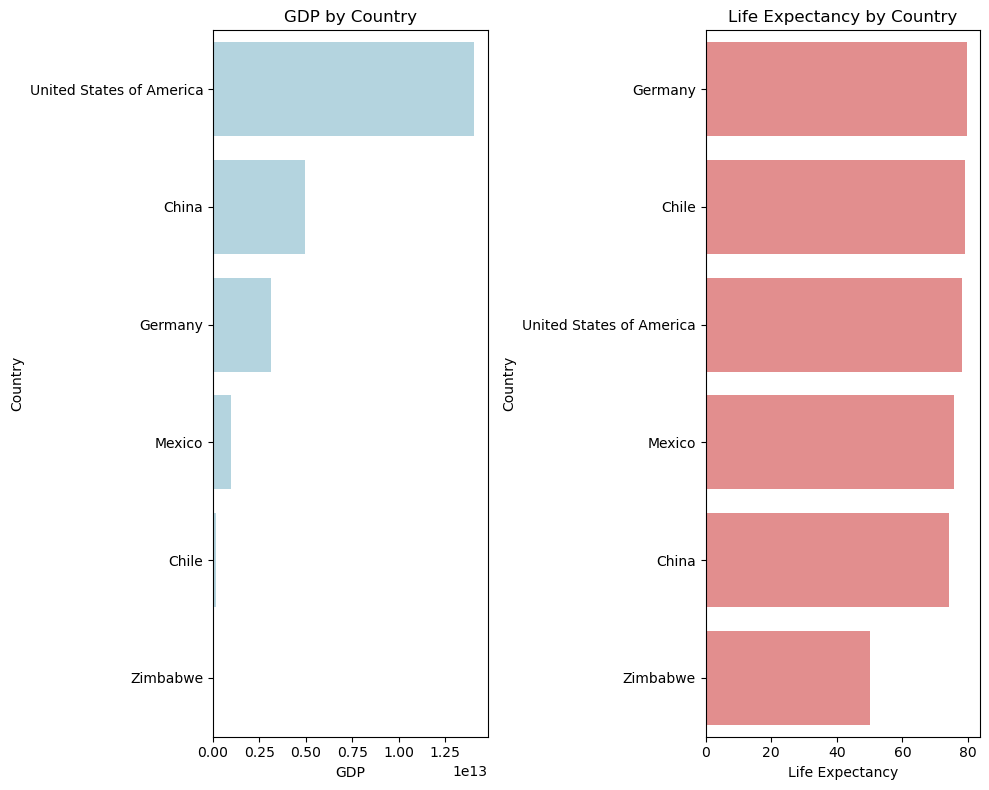

In [44]:
# Plot
plt.figure(figsize=(10, 8))
ax1=plt.subplot(1,2,1)
sns.barplot(y=gdp_by_country.index, x=gdp_by_country.values,color="lightblue")
plt.xlabel('GDP')
plt.ylabel('Country')
plt.title('GDP by Country')
ax2=plt.subplot(1,2,2)
sns.barplot(y=le_by_country.index, x=le_by_country.values,color="lightcoral")
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.title('Life Expectancy by Country')
plt.tight_layout()
plt.show()

## GDP and Life Expectancy Trends Over Time

The plots below illustrate trends in GDP and life expectancy across various countries over time. While life expectancy has shown an upward trend in all countries, the increase in GDP has not been as consistent across the board. For instance, Zimbabwe and Chile experienced relatively modest GDP growth. Notably, despite its limited GDP increase, Zimbabwe saw a substantial rise in life expectancy, reflecting significant improvements in health outcomes.


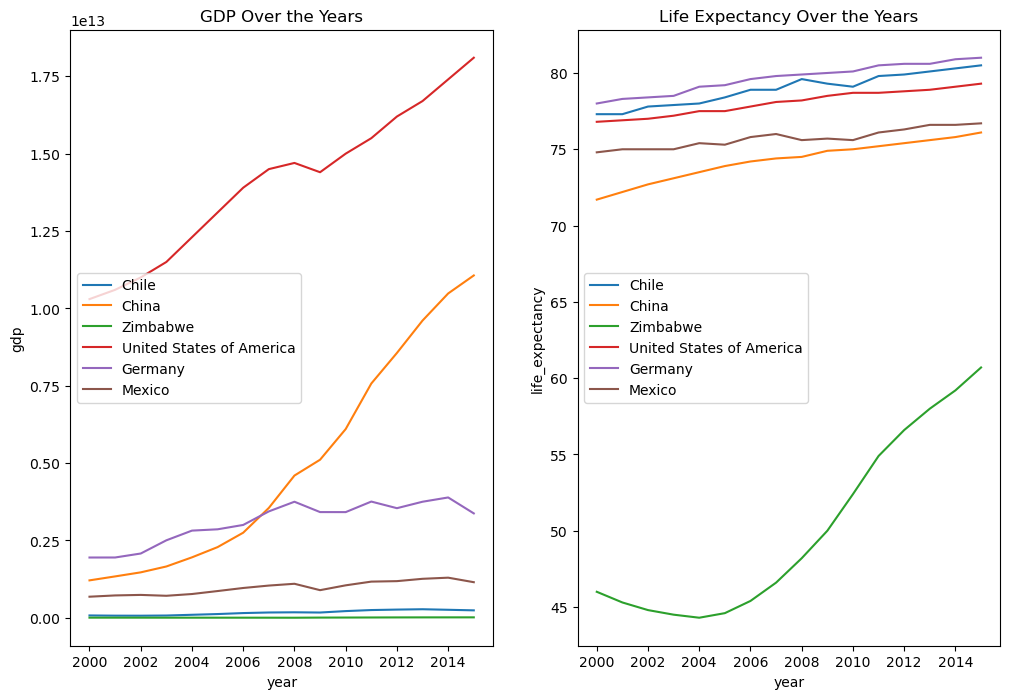

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,2,1)
sns.lineplot(x="year", y="gdp", data=data, hue="country", palette="tab10")
plt.legend(loc=6)
plt.title("GDP Over the Years")
ax2= plt.subplot(1,2,2)
sns.lineplot(x="year", y="life_expectancy", data=data, hue="country", palette="tab10")
plt.title("Life Expectancy Over the Years")
plt.legend(loc=6)
plt.show()
plt.clf()

The Pearson Correlation for Chile is 0.9499 with a p-value of 1.8659e-08
The Pearson Correlation for China is 0.9085 with a p-value of 1.1251e-06
The Pearson Correlation for Germany is 0.9327 with a p-value of 1.4019e-07
The Pearson Correlation for Mexico is 0.9322 with a p-value of 1.4687e-07
The Pearson Correlation for United States of America is 0.9817 with a p-value of 1.7500e-11
The Pearson Correlation for Zimbabwe is 0.9662 with a p-value of 1.2359e-09


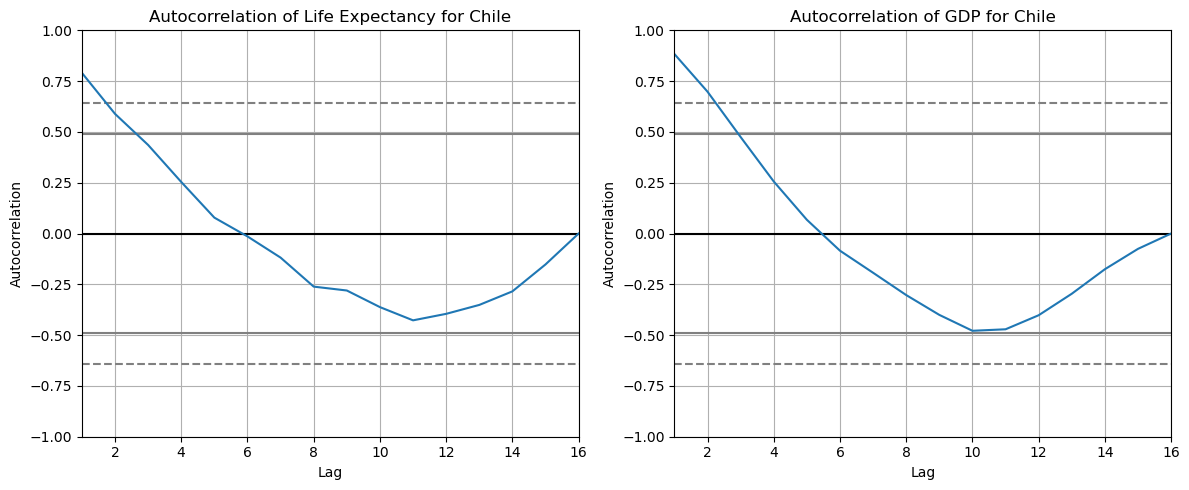

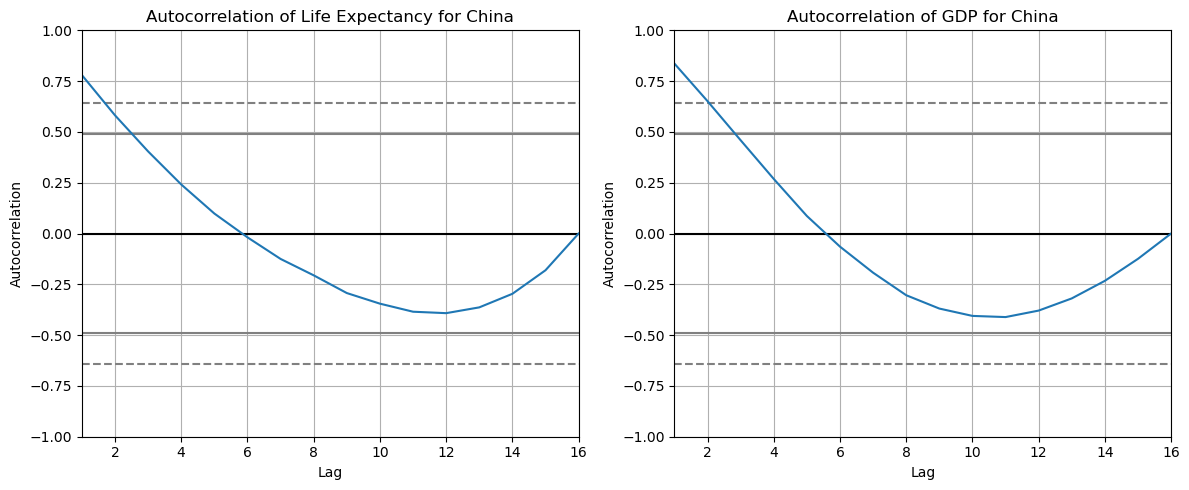

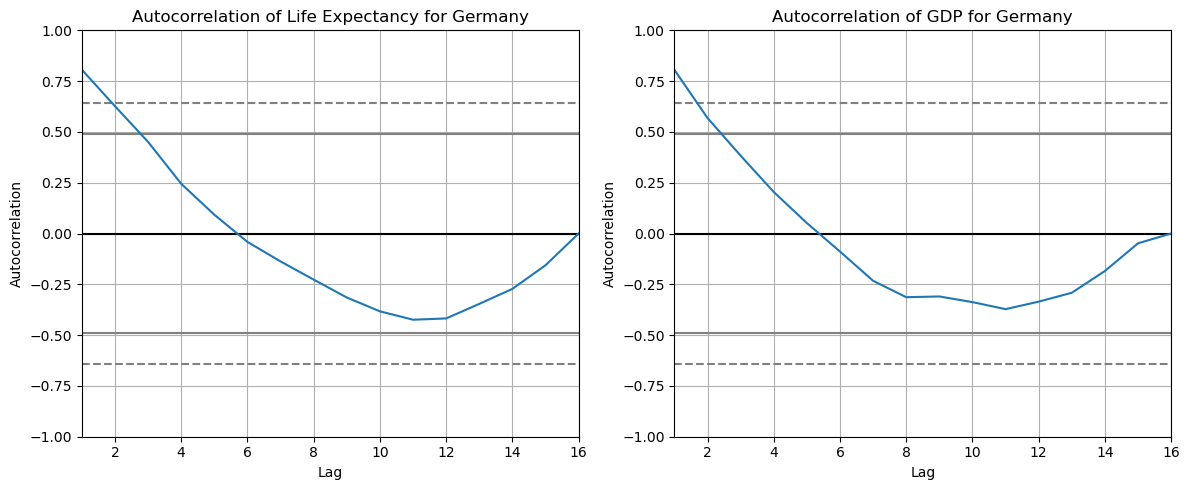

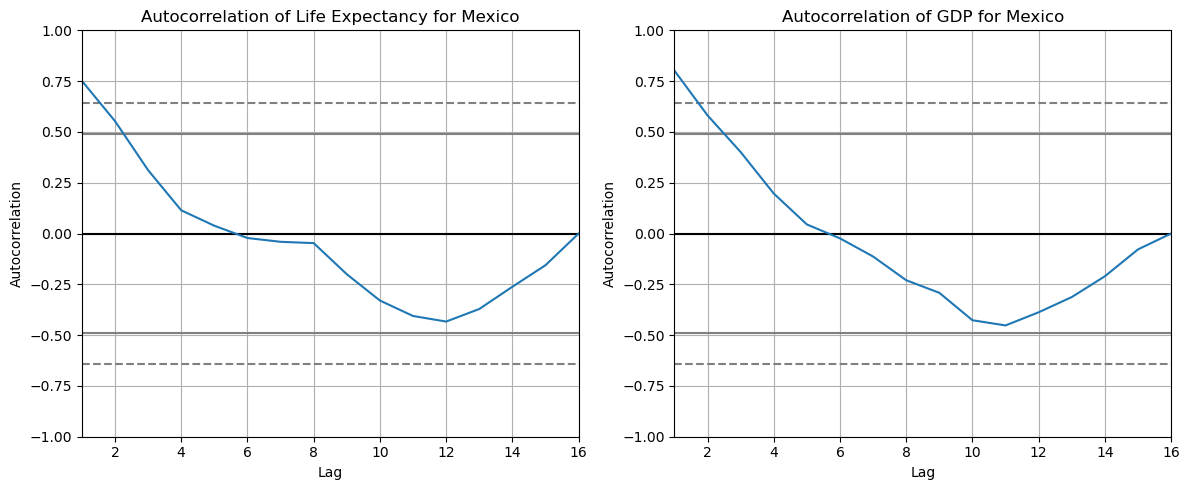

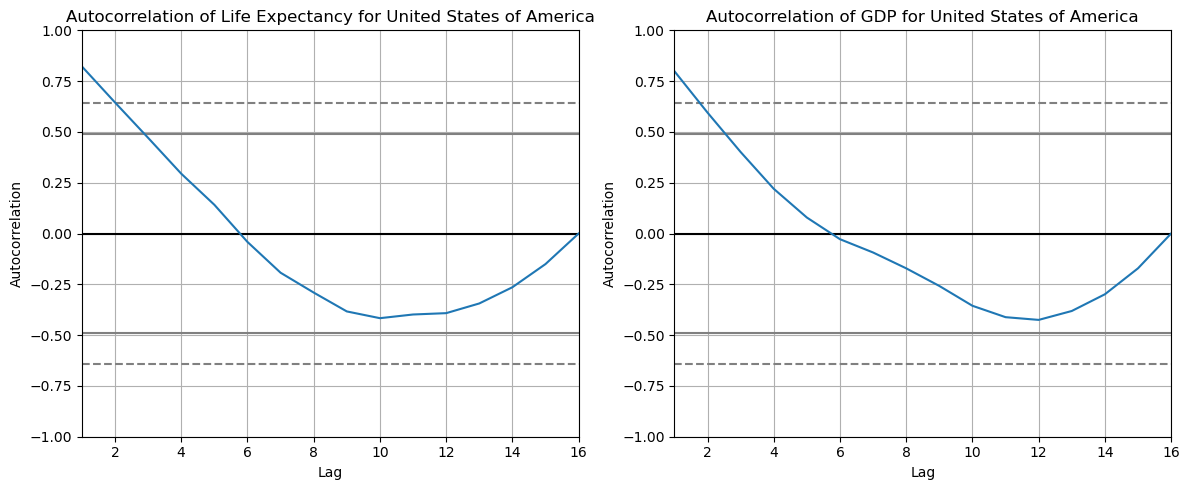

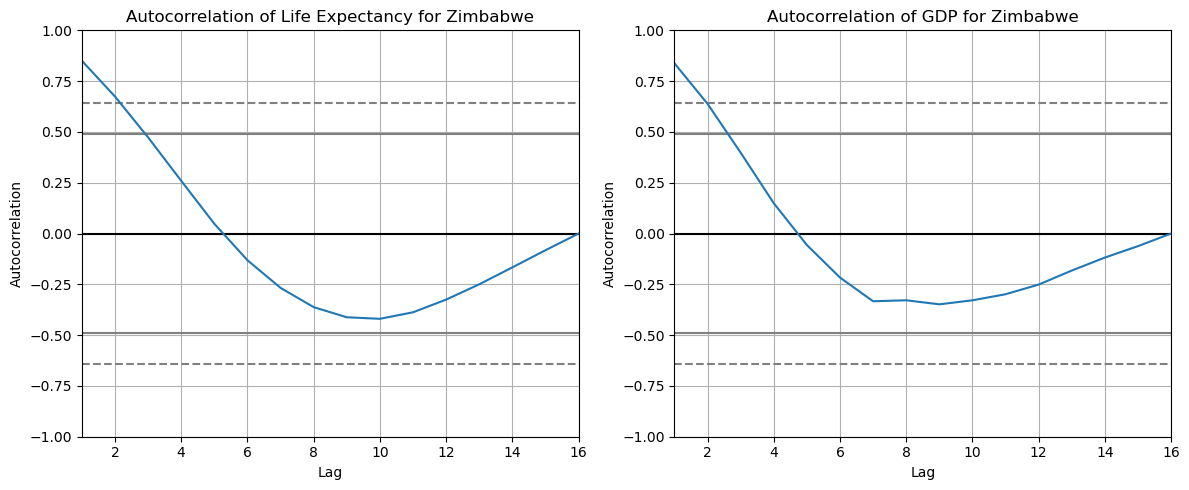

In [46]:
data = data.sort_values(by='year')
for country in countries:
    country_data = data[data['country'] == country]
    corr_gdp_life_expectancy,p = pearsonr(country_data['life_expectancy'],country_data['gdp'])
    print(f"The Pearson Correlation for {country} is {corr_gdp_life_expectancy:.4f} with a p-value of {p:.4e}")


for country in countries:
    # Filter data for the specific country
    country_data = data[data['country'] == country]
    
    # Create a new figure for each country
    plt.figure(figsize=(12, 5))
    
    # Plot autocorrelation for life expectancy
    plt.subplot(1, 2, 1)
    autocorrelation_plot(country_data['life_expectancy'])
    plt.title(f"Autocorrelation of Life Expectancy for {country}")
    
    # Plot autocorrelation for GDP
    plt.subplot(1, 2, 2)
    autocorrelation_plot(country_data['gdp'])
    plt.title(f"Autocorrelation of GDP for {country}")
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


